In [1]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [2]:
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.applications.inception_v3 import InceptionV3 

local_weight_file='/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model=InceptionV3(input_shape=(150,150,3),
                             include_top=False,
                             weights=None) 

pre_trained_model.load_weights(local_weight_file) 
for layer in pre_trained_model.layers:
    layer.trainale=False 
    
last_layer=pre_trained_model.get_layer('mixed7') 
print('last layer output shape:',last_layer.output_shape) 
last_output=last_layer.output

/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-pack

Instructions for updating:
Colocations handled automatically by placer.
last layer output shape: (None, 7, 7, 768)


In [3]:
from tensorflow.keras.optimizers import RMSprop 

x=layers.Flatten()(last_output) 
x=layers.Dense(1024,activation='relu')(x) 
# x=layers.Dropout(0,2)(x) 
x=layers.Dense(1,activation='sigmoid')(x) 
model=Model(pre_trained_model.input,x) 
model.compile(optimizer=RMSprop(lr=0.0001),
             loss='binary_crossentropy',
             metrics=['acc']) 

In [4]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#     -O /tmp/cats_and_dogs_filtered.zip

In [5]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r') 
zip_ref.extractall('/tmp') 
zip_ref.close() 

base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train') 
validation_dir=os.path.join(base_dir,'validation') 

train_cats_dir=os.path.join(train_dir,'cats') 
train_dogs_dir=os.path.join(train_dir,'dogs') 
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')



train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2, # 宽度 
    height_shift_range=0.2, # 高度 
    shear_range=0.2,  # 平行四边形 
    zoom_range=0.2, # 随机缩放范围 
    horizontal_flip=True,
    fill_mode='nearest'  
)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')  

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')  

history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
50/50 [==============================] - 4s 80ms/step - loss: 0.1445 - acc: 0.9570
 - 25s - loss: 0.3840 - acc: 0.8365 - val_loss: 0.1445 - val_acc: 0.9570
Epoch 2/100
50/50 [==============================] - 4s 72ms/step - loss: 0.1504 - acc: 0.9660
 - 18s - loss: 0.2309 - acc: 0.9015 - val_loss: 0.1504 - val_acc: 0.9660
Epoch 3/100
50/50 [==============================] - 4s 72ms/step - loss: 0.1807 - acc: 0.9660
 - 18s - loss: 0.1918 - acc: 0.9255 - val_loss: 0.1807 - val_acc: 0.9660
Epoch 4/100
50/50 [==============================] - 4s 75ms/step - loss: 0.1399 - acc: 0.9690
 - 18s - loss: 0.1463 - acc: 0.9415 - val_loss: 0.1399 - val_acc: 0.9690
Epoch 5/100
50/50 [==============================] - 4s 73ms/step - loss: 0.2790 - acc: 0.9670
 - 19s - loss: 0.1291 - acc: 0.9560 - val_loss: 0.2790 - val_acc: 0.9670
Epoch 6/100
50/50 [=========

50/50 [==============================] - 4s 73ms/step - loss: 0.2529 - acc: 0.9710
 - 19s - loss: 0.0717 - acc: 0.9885 - val_loss: 0.2529 - val_acc: 0.9710
Epoch 48/100
50/50 [==============================] - 4s 74ms/step - loss: 0.2556 - acc: 0.9710
 - 19s - loss: 0.0366 - acc: 0.9890 - val_loss: 0.2556 - val_acc: 0.9710
Epoch 49/100
50/50 [==============================] - 4s 75ms/step - loss: 0.2930 - acc: 0.9660
 - 20s - loss: 0.0264 - acc: 0.9925 - val_loss: 0.2930 - val_acc: 0.9660
Epoch 50/100
50/50 [==============================] - 4s 76ms/step - loss: 0.2180 - acc: 0.9690
 - 19s - loss: 0.0331 - acc: 0.9935 - val_loss: 0.2180 - val_acc: 0.9690
Epoch 51/100
50/50 [==============================] - 4s 81ms/step - loss: 0.6171 - acc: 0.9550
 - 20s - loss: 0.0482 - acc: 0.9895 - val_loss: 0.6171 - val_acc: 0.9550
Epoch 52/100
50/50 [==============================] - 4s 77ms/step - loss: 0.2978 - acc: 0.9650
 - 20s - loss: 0.0187 - acc: 0.9930 - val_loss: 0.2978 - val_acc: 0.9650

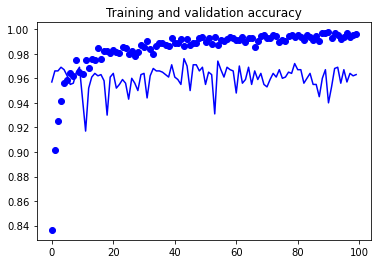

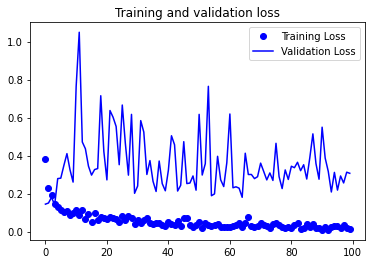

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 



acc=history.history['acc']
val_acc=history.history['val_acc'] 
loss=history.history['loss'] 


val_loss=history.history['val_loss'] 

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 加上dropout 

In [ ]:
 
x=layers.Flatten()(last_output) 
x=layers.Dense(1024,activation='relu')(x) 
x=layers.Dropout(0.5)(x) 
x=layers.Dense(1,activation='sigmoid')(x) 
model=Model(pre_trained_model.input,x) 
model.compile(optimizer=RMSprop(lr=0.0001),
             loss='binary_crossentropy',
             metrics=['acc']) 



history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2) 

acc=history.history['acc']
val_acc=history.history['val_acc'] 
loss=history.history['loss'] 

val_loss=history.history['val_loss'] 

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/100
50/50 [==============================] - 4s 89ms/step - loss: 0.1247 - acc: 0.9500
 - 25s - loss: 0.0299 - acc: 0.9900 - val_loss: 0.1247 - val_acc: 0.9500
Epoch 2/100
50/50 [==============================] - 4s 76ms/step - loss: 0.1318 - acc: 0.9780
 - 19s - loss: 0.0281 - acc: 0.9935 - val_loss: 0.1318 - val_acc: 0.9780
Epoch 3/100
50/50 [==============================] - 4s 82ms/step - loss: 0.2852 - acc: 0.9670
 - 20s - loss: 0.0182 - acc: 0.9965 - val_loss: 0.2852 - val_acc: 0.9670
Epoch 4/100
50/50 [==============================] - 4s 76ms/step - loss: 0.2888 - acc: 0.9650
 - 17s - loss: 0.0066 - acc: 0.9975 - val_loss: 0.2888 - val_acc: 0.9650
Epoch 5/100
50/50 [==============================] - 4s 76ms/step - loss: 0.3396 - acc: 0.9630
 - 19s - loss: 0.0104 - acc: 0.9980 - val_loss: 0.3396 - val_acc: 0.9630
Epoch 6/100
50/50 [==============================] - 4s 75ms/step - loss: 0.2849 - acc: 0.9640
 - 18s - loss: 0.0210 - acc: 0.9970 - val_loss: 0.2849 - val_acc:

50/50 [==============================] - 4s 72ms/step - loss: 0.3078 - acc: 0.9690
 - 19s - loss: 0.0235 - acc: 0.9950 - val_loss: 0.3078 - val_acc: 0.9690
Epoch 50/100
50/50 [==============================] - 4s 73ms/step - loss: 0.3392 - acc: 0.9660
 - 19s - loss: 0.0093 - acc: 0.9985 - val_loss: 0.3392 - val_acc: 0.9660
Epoch 51/100
50/50 [==============================] - 4s 73ms/step - loss: 0.3436 - acc: 0.9670
 - 19s - loss: 0.0136 - acc: 0.9985 - val_loss: 0.3436 - val_acc: 0.9670
Epoch 52/100
